# Scatterplot
Een scatterplot wordt gebruikt om het verband aan te tonen tussen bepaalde eigenschappen. In dit voorbeeld kijken we naar het verband tussen Wiskundescore en Leesscore vs Schrijfscore in de Students performance dataset

In [1]:
from pathlib import Path
from zipfile import ZipFile
import requests
URL = "https://www.kaggle.com/api/v1/datasets/download/spscientist/students-performance-in-exams"
STUDENTS_EXAM_ZIP = "students_performance_in_exams.zip"
students_exam_path = Path(STUDENTS_EXAM_ZIP)
if not students_exam_path.exists():
    data = requests.get(URL)
    with open(STUDENTS_EXAM_ZIP, "wb") as f:
        f.write(data.content)
    with open(STUDENTS_EXAM_ZIP, "rb") as f:
        ZipFile(f).extractall()

## Dataset inlezen en bekijken

In [1]:
import pandas as pd
STUDENTS_CSV = "StudentsPerformance.csv"
df = pd.read_csv(STUDENTS_CSV, usecols=['math score', 'reading score', 'writing score', 'gender'], dtype={'gender':'category'})
df.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [ ]:
df.info()

In [ ]:
df.describe()

## Wat weten we over een categorietype
Een categorietype zorgt ervoor dat elke categorie gekoppeld wordt aan een getal. Alleen dat getal wordt bijgehouden in de kolom. Aangezien geslachten niet echt een volgorde hebben, is 'ordered' False. Wanneer we een categorie met waarden 'slecht', 'middelmatig', 'goed' zouden hebben, heeft 'ordered' wel zin.


In [ ]:
print("df['gender'].cat.codes:",df['gender'].cat.codes, sep='\n')
print(f'{df['gender'].cat.categories=}')
print(f'{df['gender'].cat.ordered=}')


## Maak een scatterplot
Uit de scatterplot blijkt dat er een lineair verband is tussen wiskundescore en leesscore, zowel bij mannen als bij vrouwen.

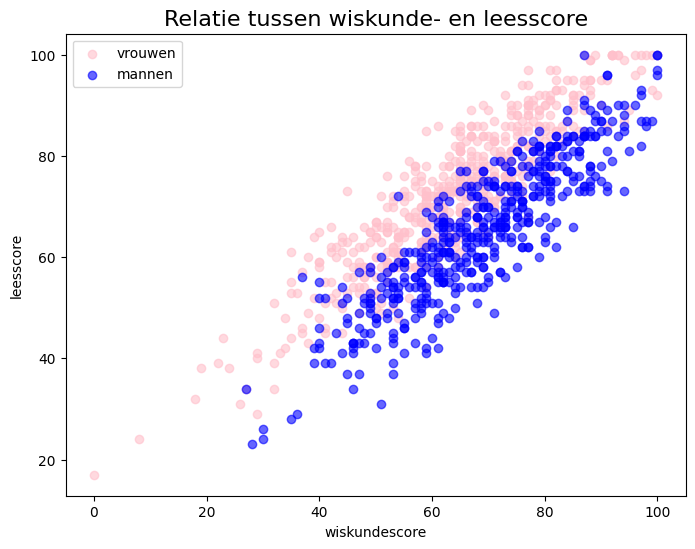

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df.loc[df['gender']=='female','math score'], df.loc[df['gender']=='female','reading score'],
            c='pink', label='vrouwen', alpha=0.6)
plt.scatter(df.loc[df['gender']=='male','math score'], df.loc[df['gender']=='male','reading score'],
            c='blue', label='mannen', alpha=0.6)
plt.xlabel('wiskundescore', fontsize=10)
plt.ylabel('leesscore', fontsize=10)
plt.title('Relatie tussen wiskunde- en leesscore', fontsize=16)
plt.legend()
plt.show()

## Scatterplot met plt.plot
De functie plt.scatter() moet rekening houden met het feit dat de 'markers' gecustomiseerd kunnen worden. De interpretatie vraagt dus tijd. Voor grote datasets is plt.plot() efficënter.

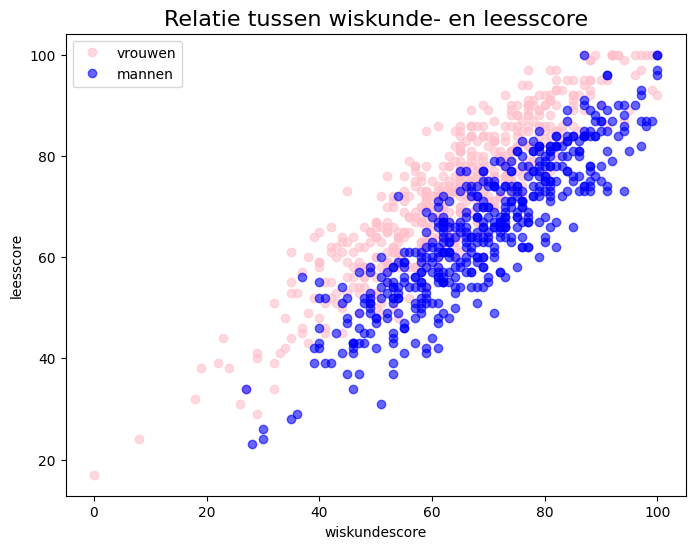

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(df.loc[df['gender']=='female','math score'], df.loc[df['gender']=='female','reading score'],
            'o', c='pink', label='vrouwen', alpha=0.6, linestyle='')
plt.plot(df.loc[df['gender']=='male','math score'], df.loc[df['gender']=='male','reading score'],
            marker='o', c='blue', label='mannen', alpha=0.6, linestyle='')
plt.xlabel('wiskundescore', fontsize=10)
plt.ylabel('leesscore', fontsize=10)
plt.title('Relatie tussen wiskunde- en leesscore', fontsize=16)
plt.legend()
plt.show()

## Misschien toch beter twee grafieken?
Door de scores van mannen en vrouwen op dezelfde grafiek te zetten, is het duidelijk dat de scores van vrouwen gemiddelde hoger liggen. Maar wanneer we dat niet willen benadrukken, kunnen we ook twee grafieken maken.

De alpha-parameter is nu niet meer echt nodig. 

We gebruiken de "constrained" layout om ervoor te zorgen dat er geen informatie "geclipped" wordt in de figuur (wordt tegenwoordig aangeraden in plaats van de 'tight layout')

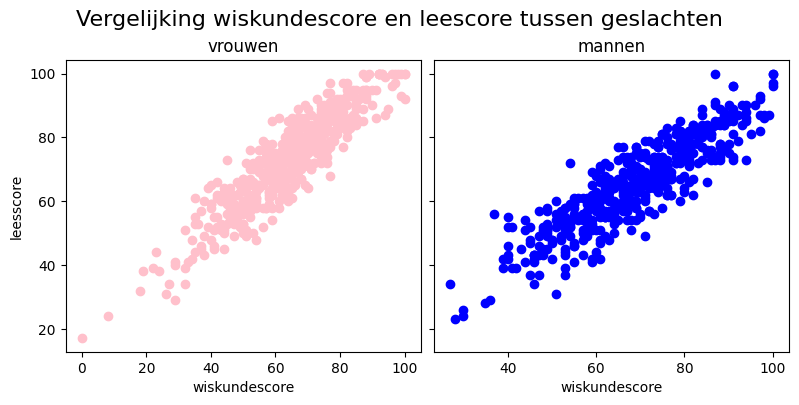

In [8]:
import matplotlib.pyplot as plt
cm = 1/2.54
fig, ax = plt.subplots(1, 2, figsize=(20*cm, 10*cm), sharey=True, layout='constrained')
fig.suptitle('Vergelijking wiskundescore en leescore tussen geslachten', fontsize=16)
ax[0].plot(df.loc[df['gender']=='female','math score'], df.loc[df['gender']=='female','reading score'],
            'o', c='pink', label='vrouwen', linestyle='')
ax[0].set_title('vrouwen')
ax[0].set_ylabel('leesscore')
ax[0].set_xlabel('wiskundescore')
ax[1].plot(df.loc[df['gender']=='male','math score'], df.loc[df['gender']=='male','reading score'],
            'o', c='blue', label='vrouwen', linestyle='')
ax[1].set_title('mannen')
ax[1].set_xlabel('wiskundescore')
plt.show()


## Scattergrafiek maken met colormap
Wanneer we een derde dimensie willen toevoegen (schrijfscore), kunnen we kleuren gebruiken. Om de betekenis te tonen van de kleuren, gebruiken we een colormap. Om ervoor te zorgen dat de bolletjes volledig worden getoond, veranderen we de limieten. Ik gebruik een sequential colormap: 1 kleur die gaat van de 'pure' kleur naar wit.

We geven een alpha-waarde kleiner dan 1 mee om overlappende waarden te tonen. 

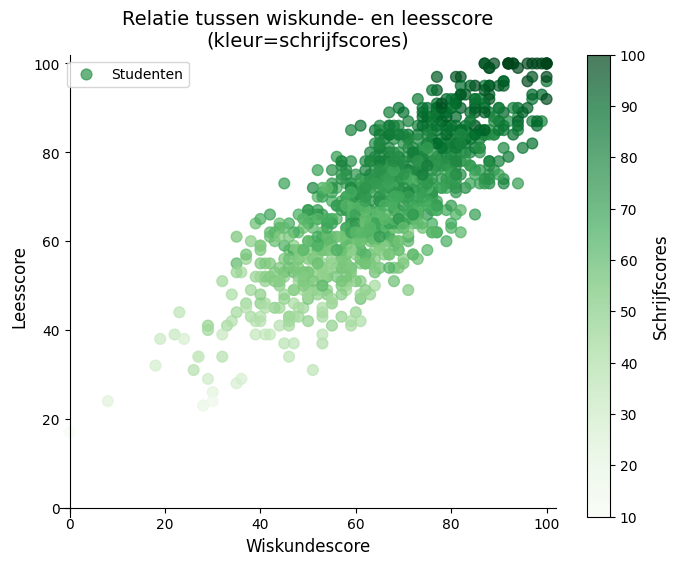

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df["math score"], df["reading score"], c=df["writing score"], cmap='Greens', alpha=0.7, s=60, label="Studenten")
plt.xlabel("Wiskundescore", fontsize=12)
plt.ylabel("Leesscore", fontsize=12)
plt.title("Relatie tussen wiskunde- en leesscore\n(kleur=schrijfscores)", fontsize=14)
plt.xlim(-2, 102)
plt.ylim(-2, 102)
plt.legend()
cbar = plt.colorbar() #we moeten geen 'mappable' meegeven: de gca() van plt wordt gebruikt
cbar.set_label('Schrijfscores', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.show()

## Kleinste kwadratenanalyse


0.7872292395756454 17.141806785685183
[[ 3.08019672e-04 -2.03567120e-02]
 [-2.03567120e-02  1.41610349e+00]]


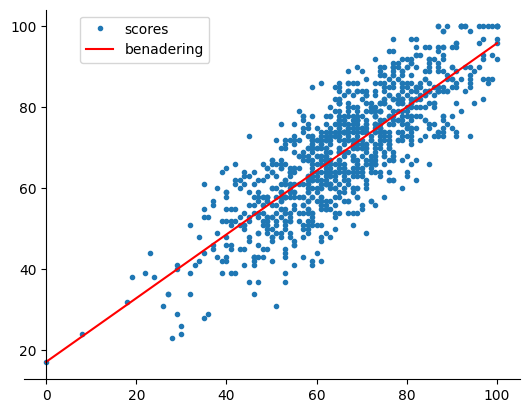

In [46]:
from scipy import optimize

# We veronderstellen een lineair verband
def lijn(x, a, b):
    y = a * x + b
    return y

x = df["math score"].to_numpy()
y = df["reading score"].to_numpy()
(a, b), cov = optimize.curve_fit(lijn, xdata=x, ydata=y)
print(a, b)
print(cov)
plt.plot(df["math score"], df["reading score"], linestyle="", marker=".", label="scores")
x1, x2 = 0, 100
y1 = lijn(x1, a, b)
y2 = lijn(x2, a, b)
plt.plot((x1, x2), (y1, y2), c='r', label="benadering")
plt.gca().spines['left'].set_position('zero')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1))
plt.show()


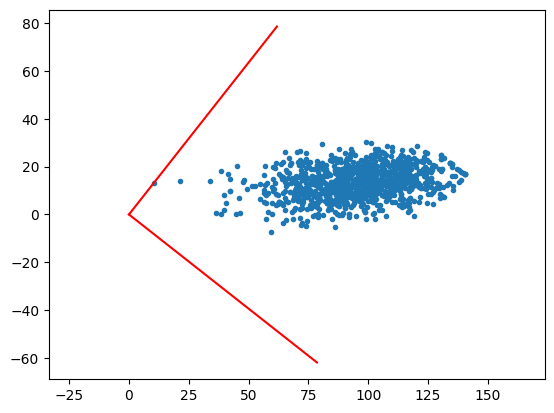

In [ ]:
import numpy as np
hoek = np.arctan(a)
rotatie_matrix = np.array([[np.cos(hoek), np.sin(hoek)], [-np.sin(hoek), np.cos(hoek)]])
oude_coordinaten = df.loc[:, ["math score", "reading score"]].to_numpy().T
nieuwe_coordinaten = rotatie_matrix @ oude_coordinaten
x_rotate = rotatie_matrix @ np.array([100, 0])
y_rotate = rotatie_matrix @ np.array([0, 100])
plt.plot(nieuwe_coordinaten[0], nieuwe_coordinaten[1], linestyle="", marker=".")
plt.plot((0, x_rotate[0]), (0, x_rotate[1]), c='r')
plt.plot((0, y_rotate[0]), (0, y_rotate[1]), c='r')
plt.axis('equal')
plt.show()